In this notebook I reconstruct images using one autoencoder trained to reconstruct bare soil. Images have been obtained from GEE --> Landsat 8: seasonal composite (4 seasons) during one year (2015) and bands:  'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7'.

In [1]:
base_path = '/cats/datastore3/claraenv/code/my-projects/'  # '/home/clara/'  # '/cats/datastore3/claraenv/code/my-projects/'  # '/home/clara/Documents/'

# Libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import colors
from sklearn.decomposition import PCA

# Paths

In [57]:
name_image = 'image_1'
diff_path = f'{base_path}autoencoders/bare_soil-detection/results/error/diff_{name_image}.npy'
path_out = f'{base_path}autoencoders/bare_soil-detection/results/classification/'

# Prepare data

In [75]:
# load difference
diff = np.load(diff_path)
print(diff.shape)

# prepare data
array = np.transpose(diff.reshape(diff.shape[0], diff.shape[1]*diff.shape[2]))
print('shape array', array.shape)

(28, 391, 2040)
shape array (797640, 28)


# k-means

**Note:** I've also tried to calculate kmeans from the error (RMSE) along the seasons and along the bands. The result is worst.

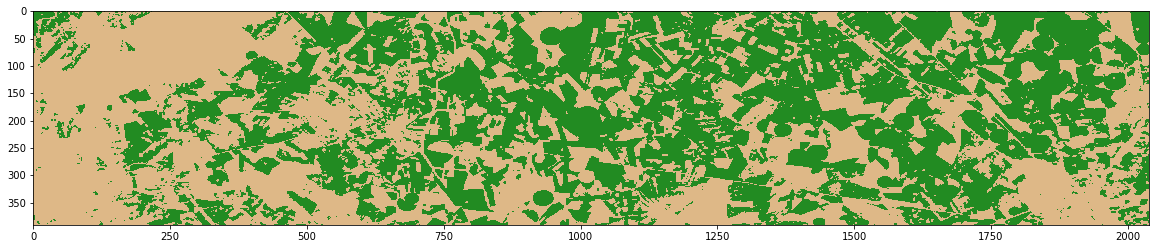

In [105]:
# train K-means
means = KMeans(n_clusters=2, n_init = 20, random_state = 1996).fit(array)

# get labels
labels = means.labels_.reshape(diff.shape[1], diff.shape[2])

# plot and save
plt.figure(figsize=(20,20))
cmap = colors.ListedColormap(['forestgreen', 'burlywood'])
plt.savefig(f'{path_out}kmeans_{name_image}.png', format='png', dpi=50)
plt.imshow(labels, cmap=cmap)

# PCA

PCA shape: (797640, 2)
PCA shape: (391, 2040, 2)


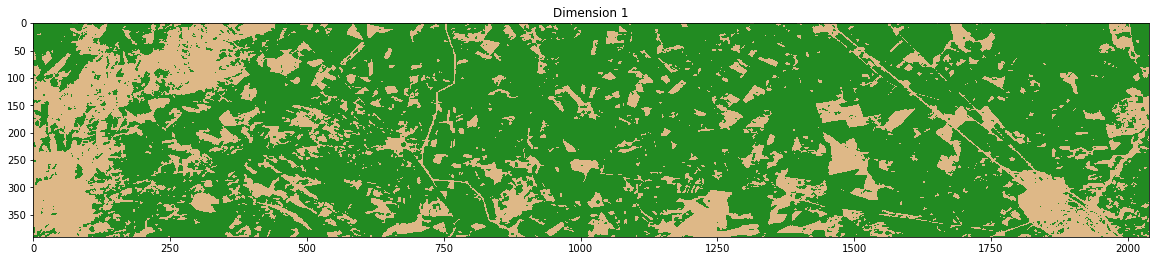

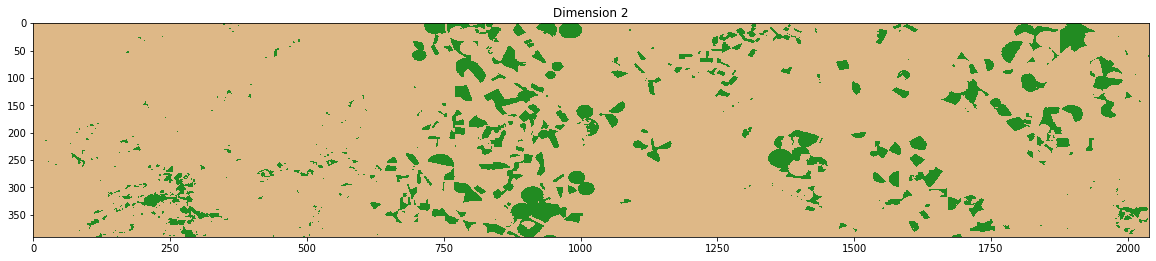

In [108]:
# calculate PCA
pca = PCA(n_components = 2)
pca.fit(array)
pca = pca.transform(array)
print(f'PCA shape: {pca.shape}')

# reshape
pca = pca.reshape(diff.shape[1],diff.shape[2], 2)
print(f'PCA shape: {pca.shape}')

# plot
plt.figure(figsize=(20,20))
cmap = colors.ListedColormap(['forestgreen', 'burlywood'])
plt.title('Dimension 1')
plt.savefig(f'{path_out}pca1_{name_image}.png', format='png', dpi=50)
plt.imshow(pca[:,:,0], cmap=cmap)

plt.figure(figsize=(20,20))
cmap = colors.ListedColormap(['burlywood', 'forestgreen'])
plt.title('Dimension 2')
plt.savefig(f'{path_out}pca2_{name_image}.png', format='png', dpi=50)
plt.imshow(pca[:,:,1], cmap=cmap)

# RMSE thresold

In [107]:
# define thresold
t = 200

shape error: (391, 2040)


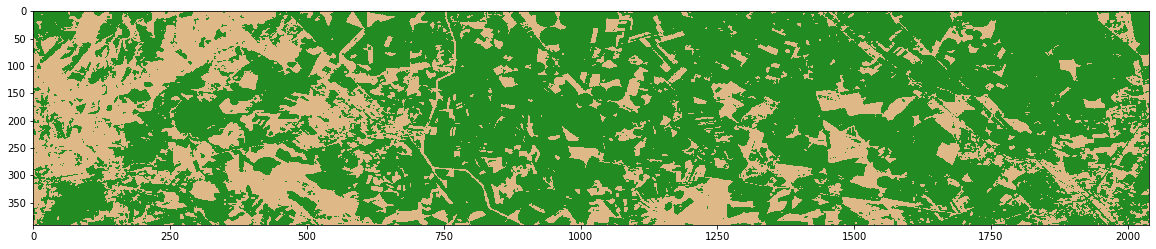

In [109]:
# Calculate RMSE in each vector u = (b1_winter, b2_winter, ..., b7_winter, b1_spring, ..., b7_spring, ...)
dif = (diff)**2  # (prediction[:,:,:]-image[:,:,:])**2
suma = np.sum(dif, axis = 0)
div = suma/(diff.shape[0])
error = div**(1/2)
print('shape error:', error.shape)

# apply thresold
error[error > t] = 1
error[error != 1] = 2

# plot and save
plt.figure(figsize=(20,20))
cmap = colors.ListedColormap(['forestgreen', 'burlywood'])
plt.savefig(f'{path_out}thresold_{name_image}.png', format='png', dpi=50)
plt.imshow(error, cmap=cmap)

# End :)